
## Datos

In [1]:
import geopandas as gpd

uk_county_districts = gpd.read_file("https://github.com/UK-Data-Science/geodf_operations/raw/main/maps/uk/_UK_County_Districts/UK_DISTRICTS_COUNTIES_CENSUS2011.shp")
uk_water = gpd.read_file("https://github.com/UK-Data-Science/geodf_operations/raw/main/maps/uk/uk_waters/hotosm_gbr_waterways_lines_shp.shp")
#uk_neighbourhood_points = gpd.read_file("https://github.com/UK-Data-Science/geodf_operations/raw/main/maps/uk/uk_neighbourhood_points/whosonfirst-data-admin-gb-neighbourhood-point.shp")
uk_macroregions = gpd.read_file("https://github.com/UK-Data-Science/geodf_operations/raw/main/maps/uk/uk_macroregions/whosonfirst-data-admin-gb-macroregion-polygon.shp")
#uk_postal_regions = gpd.read_file("https://github.com/UK-Data-Science/geodf_operations/raw/main/maps/uk/uk_postal_region/whosonfirst-data-admin-gb-postalregion-polygon.shp")
uk_railways = gpd.read_file("https://github.com/UK-Data-Science/geodf_operations/raw/main/maps/uk/uk_railways/hotosm_gbr_railways_lines_shp.shp")
uk_localadmin = gpd.read_file("https://github.com/UK-Data-Science/geodf_operations/raw/main/maps/uk/uk_localadmin/whosonfirst-data-admin-gb-localadmin-polygon.shp")

In [2]:
linkWorldMap="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"

from  fiona import listlayers
listlayers(linkWorldMap)

['countries', 'rivers', 'cities', 'indicators']

In [3]:
countries=gpd.read_file(linkWorldMap,layer='countries')
rivers=gpd.read_file(linkWorldMap,layer='rivers')
cities=gpd.read_file(linkWorldMap,layer='cities')
indicators=gpd.read_file(linkWorldMap,layer='indicators')

## Exercise 1

1. Follow the same steps in this last section to plot three maps of one country. Do not use Brazil.
2. Plot your three layers.

In [ ]:
countries['COUNTRY'].unique()

In [10]:
uk = countries[countries.COUNTRY=='United Kingdom']

In [11]:
citiesUk_clipped = gpd.clip(gdf=cities,
                          mask=uk)
riversUk_clipped = gpd.clip(gdf=rivers,
                               mask=uk)

There's no main rivers in UK (?)

ValueError: aspect must be finite and positive 

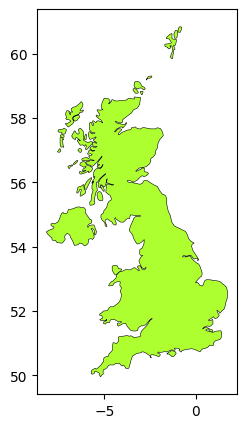

In [69]:
base = uk.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesUk_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversUk_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base).plt.show()

In [72]:
watersUk_clipped = gpd.clip(gdf=uk_water,
                               mask=uk)

<ipython-input-72-e847eb4efef6>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  watersUk_clipped = gpd.clip(gdf=uk_water,


<Axes: >

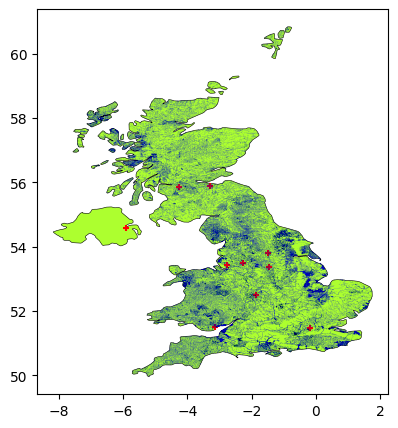

In [73]:
base = uk.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesUk_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
watersUk_clipped.plot(edgecolor='blue', linewidth=0.1, alpha=0.5,
                    ax=base)

## Exercise 2

In [13]:
uk.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
uk.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [15]:
uk.crs.is_projected

False

In [16]:
uk.centroid

<ipython-input-16-7f56de6fd8e7>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  uk.centroid


227    POINT (-2.89558 54.15535)
dtype: geometry

In [17]:
uk.to_crs(27700).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [18]:
uk.to_crs(27700).centroid

227    POINT (348609.801 461152.220)
dtype: geometry

<Axes: >

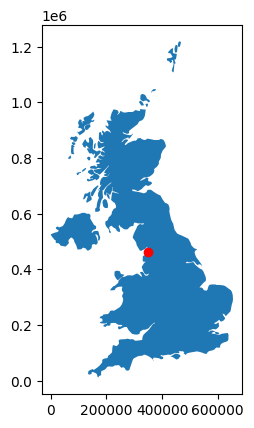

In [19]:
# replotting:

base27700=uk.to_crs(27700).plot()
uk.to_crs(27700).centroid.plot(color='red',ax=base27700)

In [20]:
uk_27700=uk.to_crs(27700)
cities_uk_27700=citiesUk_clipped.to_crs(uk_27700.crs)
rivers_uk_27700=riversUk_clipped.to_crs(uk_27700.crs)

In [109]:
## saving

import os

uk_27700.to_file(os.path.join("maps","ukMaps_27700.gpkg"), layer='country', driver="GPKG")
cities_uk_27700.to_file(os.path.join("maps","ukMaps_27700.gpkg"), layer='cities', driver="GPKG")
rivers_uk_27700.to_file(os.path.join("maps","ukMaps_27700.gpkg"), layer='rivers', driver="GPKG")
uk_27700.centroid.to_file(os.path.join("maps","ukMaps_27700.gpkg"), layer='centroid', driver="GPKG")

/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:572: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


## Exercise 3

In [108]:
import pandas as pd
infoairports=pd.read_csv("https://github.com/UK-Data-Science/geodf_operations/raw/main/maps/uk/airports.csv")

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

id    ident           type                       name  \
0        6523      00A       heliport          Total RF Heliport   
1      323361     00AA  small_airport       Aero B Ranch Airport   
2        6524     00AK  small_airport               Lowell Field   
3        6525     00AL  small_airport               Epps Airpark   
79581  307326  ZZ-0002  small_airport  Glorioso Islands Airstrip   
79582  346788  ZZ-0003  small_airport      Fainting Goat Airport   
79583  342102     ZZZW         closed     Scandium City Heliport   
79584  313629     ZZZZ  small_airport     Satsuma Iōjima Airport   

       latitude_deg  longitude_deg  elevation_ft continent iso_country  \
0         40.070985     -74.933689          11.0       NaN          US   
1         38.704022    -101.473911        3435.0       NaN          US   
2         59.947733    -151.692524         450.0       NaN          US   
3         34.864799     -86.770302         820.0       NaN          US   
79581    -11.584278      47.296389          11.0        AF          TF   
79582     32.110587     -97.356312         690.0       NaN          US   
79583     69.355287    -138.939310           4.0       NaN          CA   
79584     30.784722     130.270556         338.0        AS          JP   

      iso_region         municipality scheduled_service gps_code iata_code  \
0          US-PA             Bensalem                no     K00A       NaN   
1          US-KS                Leoti                no     00AA       NaN   
2          US-AK         Anchor Point                no     00AK       NaN   
3          US-AL              Harvest                no     00AL       NaN   
79581     TF-U-A     Grande Glorieuse                no      NaN       NaN   
79582      US-TX                 Blum                no     87TX       NaN   
79583      CA-YT  (Old) Scandium City                no      NaN       NaN   
79584      JP-46              Mishima                no     RJX7       NaN   

      local_code                                          home_link  \
0            00A  https://www.penndot.pa.gov/TravelInPA/airports...   
1           00AA                                                NaN   
2           00AK                                                NaN   
3           00AL                                                NaN   
79581        NaN                                                NaN   
79582       87TX                                                NaN   
79583        NaN                                                NaN   
79584       RJX7                                                NaN   

                                          wikipedia_link  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
79581                                                NaN   
79582                                                NaN   
79583                                                NaN   
79584  http://wikimapia.org/6705190/Satsuma-Iwo-jima-...   

                    keywords  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
79581                    NaN  
79582                    NaN  
79583  ZZZW, ZZZW, ZYW, YK96  
79584   SATSUMA,IWOJIMA,RJX7

In [23]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

id ident           type                                name  \
0  323361  00AA  small_airport                Aero B Ranch Airport   
1    6524  00AK  small_airport                        Lowell Field   
2    6525  00AL  small_airport                        Epps Airpark   
3  506791  00AN  small_airport                Katmai Lodge Airport   
4    6526  00AR         closed  Newport Hospital & Clinic Heliport   

   latitude_deg  longitude_deg  elevation_ft continent iso_country iso_region  \
0     38.704022    -101.473911        3435.0       NaN          US      US-KS   
1     59.947733    -151.692524         450.0       NaN          US      US-AK   
2     34.864799     -86.770302         820.0       NaN          US      US-AL   
3     59.093287    -156.456699          80.0       NaN          US      US-AK   
4     35.608700     -91.254898         237.0       NaN          US      US-AR   

   municipality scheduled_service gps_code iata_code local_code home_link  \
0         Leoti                no     00AA       NaN       00AA       NaN   
1  Anchor Point                no     00AK       NaN       00AK       NaN   
2       Harvest                no     00AL       NaN       00AL       NaN   
3   King Salmon                no     00AN       NaN       00AN       NaN   
4       Newport                no      NaN       NaN        NaN       NaN   

  wikipedia_link keywords  
0            NaN      NaN  
1            NaN      NaN  
2            NaN      NaN  
3            NaN      NaN  
4            NaN     00AR

In [24]:
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'iata_code',
       'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [25]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','iso_region','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79584 entries, 0 to 79583
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           79584 non-null  object 
 1   type           79584 non-null  object 
 2   latitude_deg   79584 non-null  float64
 3   longitude_deg  79584 non-null  float64
 4   elevation_ft   64822 non-null  float64
 5   iso_region     79584 non-null  object 
 6   municipality   73972 non-null  object 
dtypes: float64(3), object(4)
memory usage: 4.3+ MB


In [110]:
#some formating

numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

In [ ]:
infoairports.info()

<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

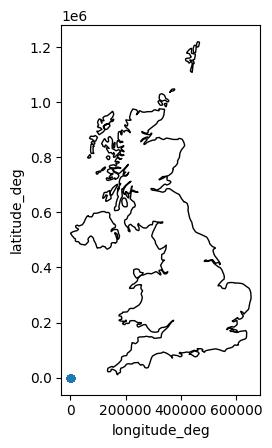

In [112]:
base = uk_27700.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [113]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=uk.crs.to_epsg())

In [27]:
airports_27700=airports.to_crs(27700)

base = uk_27700.plot(color='white', edgecolor='black')
airports_27700.plot(ax=base)

<Axes: >

In [79]:
os.makedirs("maps", exist_ok=True)

In [82]:
airports_27700.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_27700.to_file(os.path.join("maps","ukMaps_27700.gpkg"), layer='airports', driver="GPKG")

## Exercise 4

In [29]:
uk_27700

COUNTRY                                           geometry
227  United Kingdom  MULTIPOLYGON (((463756.092 1199463.383, 458260...

In [30]:
uk_27700.boundary

227    MULTILINESTRING ((463756.092 1199463.383, 4582...
dtype: geometry

<Axes: >

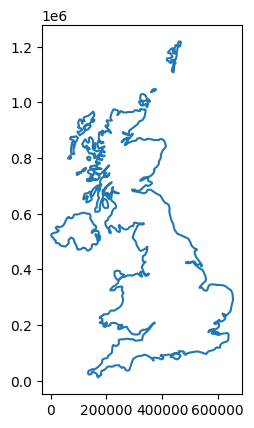

In [31]:
uk_27700.boundary.plot()

In [32]:
type(uk_27700.boundary)

geopandas.geoseries.GeoSeries

In [33]:
uk_27700.boundary.to_frame()

0
227  MULTILINESTRING ((463756.092 1199463.383, 4582...

In [34]:
# conversion
uk_border=uk_27700.boundary.to_frame()

# new column (optional)
uk_border['name']='UK'

# renaming the geometry column
uk_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
uk_border = uk_border.set_geometry("geometry")

# verifying:
uk_border.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

## Exercise 5

In [37]:
uk_county_districts.geometry.head()

0    MULTIPOLYGON (((-1.24281 54.72227, -1.24221 54...
1    MULTIPOLYGON (((-1.20097 54.57760, -1.20171 54...
2    MULTIPOLYGON (((-0.79421 54.55835, -0.79409 54...
3    MULTIPOLYGON (((-1.25075 54.62531, -1.25074 54...
4    POLYGON ((-1.43833 54.59508, -1.43810 54.59494...
Name: geometry, dtype: geometry

In [38]:
uk_county_districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Exercise 6

<Axes: >

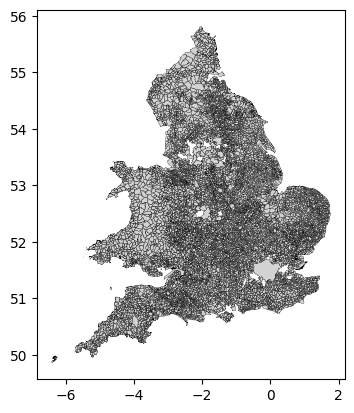

In [39]:
uk_localadmin.plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [40]:
uk_localadmin.head()

id   parent_id               name placetype placelocal country  \
0  101750297  1360698841           Plymouth  locality       None      GB   
1  101750303  1360699019  Brighton and Hove  locality       None      GB   
2  101750305  1880773233        Bournemouth  locality       None      GB   
3  101750307  1360699069         Portsmouth  locality       None      GB   
4  101750309  1880773233              Poole  locality       None      GB   

                        repo        lat       lon    min_lat  ...  name_rus  \
0  whosonfirst-data-admin-gb  50.393988 -4.113637  50.340841  ...    Плимут   
1  whosonfirst-data-admin-gb  50.847862 -0.142797  50.798141  ...       Хов   
2  whosonfirst-data-admin-gb  50.740796 -1.864552  50.709050  ...   Борнмут   
3  whosonfirst-data-admin-gb  50.817510 -1.078444  50.777470  ...  Портсмут   
4  whosonfirst-data-admin-gb  50.740994 -1.971466  50.681400  ...       Пул   

      name_spa     name_swe     name_tur  name_ukr       name_urd    name_vie  \
0     Plymouth     Plymouth     Plymouth    Плімут      پلایماؤتھ    Plymouth   
1         Hove         Hove         None      Гоув           ہوئے        None   
2  Bournemouth  Bournemouth  Bournemouth   Борнмут       بورنموتھ        None   
3   Portsmouth   Portsmouth   Portsmouth  Портсмут     پورٹسماؤتھ  Portsmouth   
4        Poole        Poole         None       Пул  پول، انگلستان        None   

  name_zho       geom_src                                           geometry  
0     普利茅斯  quattroshapes  POLYGON ((-4.05023 50.37653, -4.05024 50.37642...  
1       荷甫  quattroshapes  POLYGON ((-0.06771 50.82204, -0.06791 50.82188...  
2     伯恩茅斯  quattroshapes  POLYGON ((-1.80923 50.72032, -1.80941 50.72035...  
3     朴次茅斯  quattroshapes  POLYGON ((-1.05436 50.85505, -1.05430 50.85522...  
4       普爾  quattroshapes  POLYGON ((-1.94845 50.68140, -1.94908 50.68155...  

[5 rows x 56 columns]

In [41]:
uk_localadmin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11523 entries, 0 to 11522
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          11523 non-null  int64   
 1   parent_id   11523 non-null  int64   
 2   name        11523 non-null  object  
 3   placetype   11523 non-null  object  
 4   placelocal  11368 non-null  object  
 5   country     11523 non-null  object  
 6   repo        11523 non-null  object  
 7   lat         11523 non-null  float64 
 8   lon         11523 non-null  float64 
 9   min_lat     11523 non-null  float64 
 10  min_lon     11523 non-null  float64 
 11  max_lat     11523 non-null  float64 
 12  max_lon     11523 non-null  float64 
 13  min_zoom    11523 non-null  float64 
 14  max_zoom    2 non-null      object  
 15  min_label   11523 non-null  float64 
 16  max_label   11523 non-null  int64   
 17  modified    11523 non-null  object  
 18  is_funky    1 non-null      object  
 

In [42]:
uk_localadmin.county_id.value_counts()

county_id
1360698753    732
1360699059    332
1360698745    269
1360698937    261
1360699053    240
             ... 
1880771691      1
1880771651      1
1880771353      1
1360698789      1
1360698983      1
Name: count, Length: 275, dtype: int64

In [43]:
uk_localadmin[uk_localadmin.county_id=='1360698753'].head()

id   parent_id          name   placetype    placelocal country  \
73   101750597  1360698753     Harrogate    locality          None      GB   
118  101874185  1360698753   Scarborough    locality          None      GB   
151  404429225  1360698753     Ferrensby  localadmin  civil parish      GB   
157  404429241  1360698753        Birkin  localadmin  civil parish      GB   
161  404429251  1360698753  Little Busby  localadmin  civil parish      GB   

                          repo        lat       lon    min_lat  ...  \
73   whosonfirst-data-admin-gb  53.988985 -1.533172  53.951823  ...   
118  whosonfirst-data-admin-gb  54.277307 -0.415285  54.246220  ...   
151  whosonfirst-data-admin-gb  54.034695 -1.439137  54.025449  ...   
157  whosonfirst-data-admin-gb  53.733245 -1.213180  53.713434  ...   
161  whosonfirst-data-admin-gb  54.444453 -1.220121  54.422878  ...   

      name_rus     name_spa      name_swe   name_tur   name_ukr  name_urd  \
73   Харрогейт    Harrogate     Harrogate  Harrogate  Харрогейт  ہاروجاتی   
118   Скарборо  Scarborough   Scarborough       None   Скарборо  سکاربورو   
151       None         None     Ferrensby       None       None      None   
157       None         None        Birkin       None       None      None   
161       None         None  Little Busby       None       None      None   

     name_vie name_zho       geom_src  \
73       None     哈罗盖特  quattroshapes   
118      None     斯卡布羅    whosonfirst   
151      None     None  quattroshapes   
157      None     None  quattroshapes   
161      None     None  quattroshapes   

                                              geometry  
73   POLYGON ((-1.50505 54.01880, -1.50482 54.01884...  
118  POLYGON ((-0.36898 54.25578, -0.36960 54.25543...  
151  POLYGON ((-1.43432 54.04407, -1.43364 54.04400...  
157  POLYGON ((-1.16655 53.72953, -1.16666 53.72959...  
161  POLYGON ((-1.22317 54.45534, -1.22290 54.45507...  

[5 rows x 56 columns]

In [44]:
uk_localadmin[uk_localadmin.county_id=='1360698753'].plot()

<Axes: >

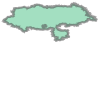

In [45]:
uk_localadmin[uk_localadmin.county_id=='1360698753'].unary_union

In [46]:
yorkshire_union=uk_localadmin[uk_localadmin.county_id=='1360698753'].unary_union

In [47]:
type(yorkshire_union)

shapely.geometry.polygon.Polygon

In [48]:
gpd.GeoDataFrame(index=[0],data={'county_id':'1360698753'},
                 crs=uk_localadmin.crs,
                 geometry=[yorkshire_union])

county_id                                           geometry
0  1360698753  POLYGON ((-2.02968 53.86105, -2.02983 53.86083...

In [49]:
yorkshire_union=uk_localadmin[uk_localadmin.county_id=='1360698753'].dissolve().plot()

In [50]:
yorkshire_dissolve=yorkshire_union=uk_localadmin[uk_localadmin.county_id=='1360698753'].dissolve()

# we got?
type(yorkshire_dissolve)

geopandas.geodataframe.GeoDataFrame

In [51]:
yorkshire_dissolve

geometry         id   parent_id  \
0  POLYGON ((-2.02968 53.86105, -2.02983 53.86083...  101750597  1360698753   

        name placetype    placelocal country                       repo  \
0  Harrogate  locality  civil parish      GB  whosonfirst-data-admin-gb   

         lat       lon  ...   name_por   name_rus   name_spa   name_swe  \
0  53.988985 -1.533172  ...  Harrogate  Харрогейт  Harrogate  Harrogate   

    name_tur   name_ukr  name_urd  name_vie name_zho       geom_src  
0  Harrogate  Харрогейт  ہاروجاتی       Chì     哈罗盖特  quattroshapes  

[1 rows x 56 columns]

In [52]:
keep = ['geometry','country','county_id']
yorkshire_dissolve=yorkshire_dissolve[keep]

In [53]:
uk_macroregions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          4 non-null      int64   
 1   parent_id   4 non-null      int64   
 2   name        4 non-null      object  
 3   placetype   4 non-null      object  
 4   placelocal  4 non-null      object  
 5   country     4 non-null      object  
 6   repo        4 non-null      object  
 7   lat         4 non-null      float64 
 8   lon         4 non-null      float64 
 9   min_lat     4 non-null      float64 
 10  min_lon     4 non-null      float64 
 11  max_lat     4 non-null      float64 
 12  max_lon     4 non-null      float64 
 13  min_zoom    4 non-null      int64   
 14  max_zoom    0 non-null      object  
 15  min_label   4 non-null      int64   
 16  max_label   4 non-null      int64   
 17  modified    4 non-null      object  
 18  is_funky    0 non-null      object  
 19  popu

<Axes: >

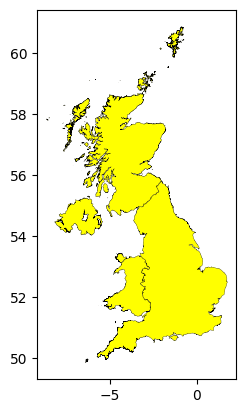

In [54]:
uk_macroregions.dissolve(by='iso_code').plot(facecolor='yellow', edgecolor='black',linewidth=0.2)

In [55]:
uk_iso_diss=uk_macroregions.dissolve(by='iso_code')

In [56]:
uk_iso_diss

geometry         id  \
iso_code                                                                 
GB-ENG    MULTIPOLYGON (((-6.39865 49.86546, -6.39874 49...  404227469   
GB-NIR    MULTIPOLYGON (((-7.42951 54.16087, -7.42946 54...  404227473   
GB-SCT    MULTIPOLYGON (((-7.63924 56.78946, -7.63915 56...  404227471   
GB-WLS    MULTIPOLYGON (((-5.66880 51.72043, -5.66879 51...  404227475   

          parent_id              name    placetype    placelocal country  \
iso_code                                                                   
GB-ENG     85633159           England  macroregion       country      GB   
GB-NIR     85633159  Northern Ireland  macroregion      province      GB   
GB-SCT     85633159          Scotland  macroregion       country      GB   
GB-WLS     85633159             Wales  macroregion  principality      GB   

                               repo        lat       lon  ...  \
iso_code                                                  ...   
GB-ENG    whosonfirst-data-admin-gb  52.546370 -1.408386  ...   
GB-NIR    whosonfirst-data-admin-gb  54.760375 -6.891771  ...   
GB-SCT    whosonfirst-data-admin-gb  56.787446 -3.981650  ...   
GB-WLS    whosonfirst-data-admin-gb  52.140232 -3.651471  ...   

                  name_por           name_rus           name_spa    name_swe  \
iso_code                                                                       
GB-ENG          Inglaterra             Англия         Inglaterra     England   
GB-NIR    Irlanda do Norte  Северная Ирландия  Irlanda del Norte  Nordirland   
GB-SCT             Escócia          Шотландия            Escocia   Skottland   
GB-WLS       País de Gales              Уэльс              Gales       Wales   

               name_tur           name_ukr        name_urd     name_vie  \
iso_code                                                                  
GB-ENG        İngiltere             Англія        انگلستان          Anh   
GB-NIR    Kuzey İrlanda  Північна Ірландія  شمالی آئر لینڈ  Bắc Ireland   
GB-SCT          İskoçya          Шотландія       سکاٹ لینڈ     Scotland   
GB-WLS           Galler              Уельс            ویلز        Wales   

         name_zho     geom_src  
iso_code                        
GB-ENG        英格兰           os  
GB-NIR       北爱尔兰  whosonfirst  
GB-SCT        蘇格蘭  whosonfirst  
GB-WLS        威爾斯           os  

[4 rows x 55 columns]

In [57]:
keep = ['geometry','country','name']
uk_iso_diss = uk_iso_diss[keep]

### q es esto

In [58]:
indicators.head()

COUNTRY                            Officialstatename  \
0  ANTIGUA AND BARBUDA                          Antigua and Barbuda   
1          AFGHANISTAN          The Islamic Republic of Afghanistan   
2              ALGERIA  The People's Democratic Republic of Algeria   
3           AZERBAIJAN                   The Republic of Azerbaijan   
4              ALBANIA                      The Republic of Albania   

  InternetccTLD iso2 iso3  fragility_date  fragility          co2  co2_date  \
0           .ag   AG  ATG            2019       54.4     729000.0      2019   
1           .af   AF  AFG            2019      105.0    7893000.0      2019   
2           .dz   DZ  DZA            2019       75.4  151633000.0      2019   
3           .az   AZ  AZE            2019       73.2   35389000.0      2019   
4           .al   AL  ALB            2019       58.9    3794000.0      2019   

                              region  ForestRev_gdp  ForestRev_date  \
0  CENTRAL AMERICA AND THE CARIBBEAN           0.00            2018   
1                         SOUTH ASIA           0.20            2018   
2                             AFRICA           0.10            2018   
3                        MIDDLE EAST           0.02            2018   
4                             EUROPE           0.18            2018   

   fragility_Qt  fragility_Qt_jc5 fragility_Qt_jc5_cat  \
0     -0.530113                 1               1_Good   
1      1.827146                 4               4_Poor   
2      0.304520                 3                3_Bad   
3      0.233695                 2             2_Middle   
4     -0.424447                 1               1_Good   

                                            geometry  
0  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...  
1  POLYGON ((61.27656 35.60725, 61.29638 35.62853...  
2  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...  
3  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...  
4  POLYGON ((20.79192 40.43154, 20.78722 40.39472...

In [59]:
indicators.dissolve(
     by="region",
     aggfunc={
         "COUNTRY": "count",
         "fragility": ["mean"],
         "co2": ["mean"],
         "ForestRev_gdp": ["mean"]
     },as_index=False,
 )

region  \
0                             AFRICA   
1              AUSTRALIA AND OCEANIA   
2  CENTRAL AMERICA AND THE CARIBBEAN   
3                       CENTRAL ASIA   
4            EAST AND SOUTHEAST ASIA   
5                             EUROPE   
6                        MIDDLE EAST   
7                      NORTH AMERICA   
8                      SOUTH AMERICA   
9                         SOUTH ASIA   

                                            geometry  (COUNTRY, count)  \
0  MULTIPOLYGON (((-2.92813 5.10022, -2.93222 5.1...                51   
1  MULTIPOLYGON (((-176.51779 -43.90778, -176.532...                 6   
2  MULTIPOLYGON (((-81.71556 7.44681, -81.71362 7...                16   
3  MULTIPOLYGON (((50.03472 45.04833, 50.04250 45...                 6   
4  MULTIPOLYGON (((105.26361 -6.54472, 105.26138 ...                15   
5  MULTIPOLYGON (((-18.13223 27.77264, -18.11320 ...                39   
6  MULTIPOLYGON (((42.76819 14.06653, 42.78680 14...                16   
7  MULTIPOLYGON (((-155.21100 20.00166, -155.1833...                 3   
8  MULTIPOLYGON (((-74.93431 -51.85501, -74.93251...                11   
9  MULTIPOLYGON (((73.10193 -0.58431, 73.09915 -0...                 8   

   (fragility, mean)   (co2, mean)  (ForestRev_gdp, mean)  
0          85.664706  1.670835e+07               3.239804  
1          55.100000  7.679500e+07               3.630000  
2          62.993750  1.104856e+07               0.359375  
3          72.883333  3.898807e+08               0.236667  
4          64.120000  9.608337e+08               0.586667  
5          40.348718  9.866674e+07               0.199231  
6          71.756250  1.583754e+08               0.032500  
7          42.566667  2.073395e+09               0.073333  
8          61.436364  8.613718e+07               1.064545  
9          83.975000  3.309434e+08               0.365000

<Axes: >

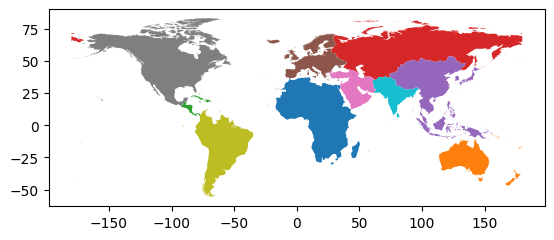

In [60]:
indicatorsByRegion=indicators.dissolve(
     by="region",
     aggfunc={
         "COUNTRY": "count",
         "fragility": ["mean"],
         "co2": ["mean"],
         "ForestRev_gdp": ["mean"]
     },as_index=False,
 )


indicatorsByRegion.plot(column = 'region')

ImportError: The 'mapclassify' package (>= 2.4.0) is required to use the 'scheme' keyword.

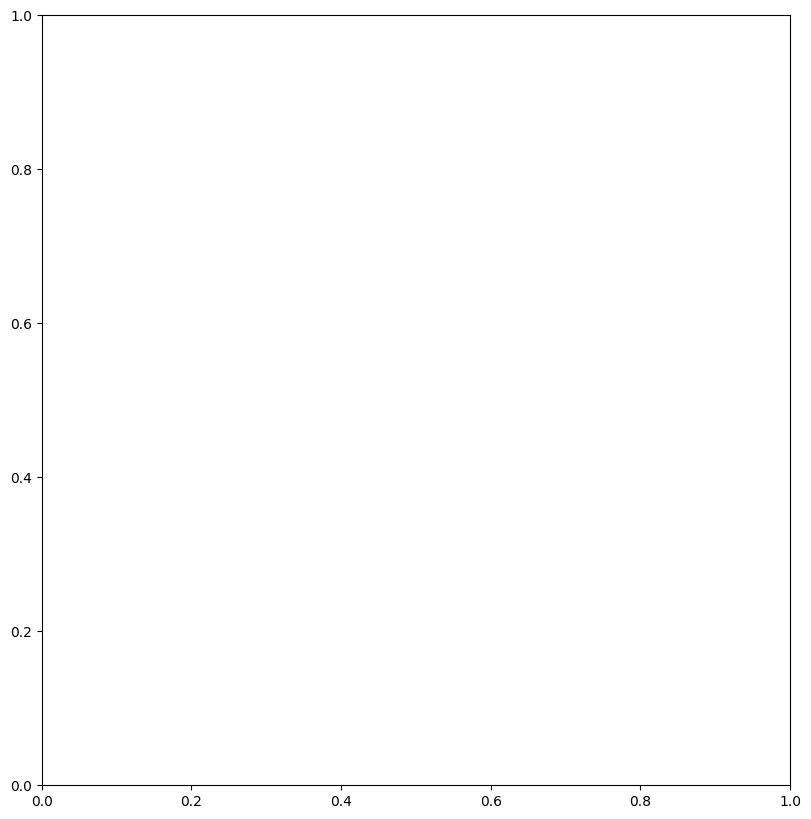

In [61]:
indicatorsByRegion.plot(column =('fragility', 'mean'),scheme='quantiles', cmap='OrRd',
                        legend=True,
                        legend_kwds={"title": "Fragility",'loc': 'lower left'},
                        edgecolor='black',linewidth=0.2,
                        figsize=(15, 10))

## Exercise 7

In [6]:
uk_27700.centroid

NameError: name 'uk_27700' is not defined

In [7]:
uk_27700.centroid.x.values[0],uk_27700.centroid.y.values[0]

NameError: name 'uk_27700' is not defined

In [ ]:
airports_27700

In [8]:
# coordinates
centroidX,centroidY=uk_27700.centroid.x.values[0],uk_27700.centroid.y.values[0]

# subsets of medium airports
uk_AirTopLeft=airports_27700[airports_27700.kind=='medium_airport'].cx[:centroidX,centroidY:]
uk_AirTopRight=airports_27700[airports_27700.kind=='medium_airport'].cx[centroidX:,centroidY:]
uk_AirBottomLeft=airports_27700[airports_27700.kind=='medium_airport'].cx[:centroidX,:centroidY]
uk_AirBottomRight=airports_27700[airports_27700.kind=='medium_airport'].cx[centroidX:,:centroidY]

NameError: name 'uk_27700' is not defined

In [ ]:
base=uk_AirTopLeft.plot(facecolor='grey', alpha=0.4)
uk_AirTopRight.plot(ax=base,facecolor='orange', alpha=0.4)
uk_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
uk_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)

In [ ]:
uk_AirBottomLeft.convex_hull.plot()

In [ ]:
uk_AirBottomLeft.dissolve().convex_hull.plot()

In [ ]:
uk_AirBottomLeft.dissolve().convex_hull

In [ ]:
# just the union
large_airport=airports_27700[airports_27700.kind=='large_airport']
large_airport.unary_union

In [ ]:
large_airport.unary_union.convex_hull

In [ ]:
LargeAirport_hull= gpd.GeoDataFrame(index=[0],
                                    crs=large_airport.crs,
                                    geometry=[large_airport.unary_union.convex_hull])
LargeAirport_hull['name']='large airports hull' # optional

# then

LargeAirport_hull

In [ ]:
base=uk_27700.plot(facecolor='yellow')
large_airport.plot(ax=base)
LargeAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

## Exercise 8

1. Apply two of these operations to your maps.
2. Apply two of these operations to the  next maps:

In [97]:
minx, miny, maxx, maxy = uk_localadmin.total_bounds

centroidX = (minx + maxx) / 2
centroidY = (miny + maxy) / 2

In [98]:
# the north
LocalN_uk=uk_localadmin.cx[:,centroidY:]
# the south
LocalS_uk=uk_localadmin.cx[:,:centroidY]
# the west
LocalW_uk=uk_localadmin.cx[:centroidX,:]
# the east
LocalE_uk=uk_localadmin.cx[centroidX:,:]

<Axes: >

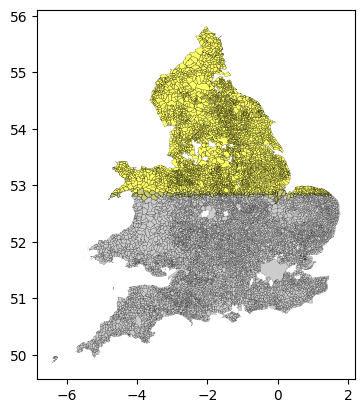

In [99]:
base=LocalN_uk.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
LocalS_uk.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

<Axes: >

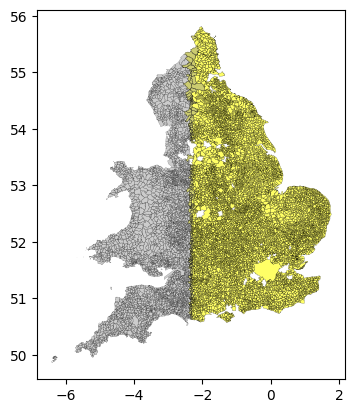

In [100]:
base=LocalE_uk.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
LocalW_uk.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

INTERSECTION

<Axes: >

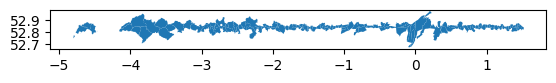

In [101]:
localNS_uk=LocalN_uk.overlay(LocalS_uk, how="intersection",keep_geom_type=True)
localNS_uk.plot()

<Axes: >

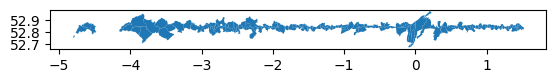

In [102]:
LocalN_uk.sjoin(LocalS_uk, how="inner", predicate='contains').plot()

<Axes: >

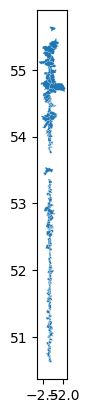

In [103]:
# keeping the overlay
localWE_uk=LocalW_uk.overlay(LocalE_uk, how="intersection",keep_geom_type=True)
localWE_uk.plot(edgecolor='white',linewidth=0.1)

SYMMETRIC DIFFERENCE

<Axes: >

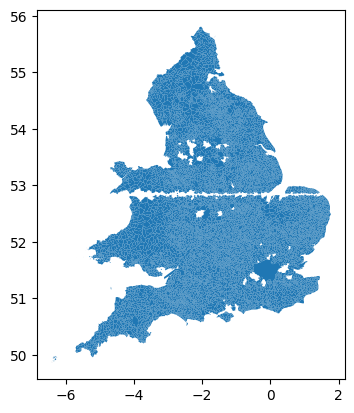

In [106]:
LocalN_uk.overlay(LocalS_uk, how="symmetric_difference",keep_geom_type=False).plot()

In [107]:
LocalW_uk.overlay(LocalE_uk, how="symmetric_difference",keep_geom_type=False).plot()

<Axes: >